# HAMOYE STAGE C
<b>LOGISTIC REGRESSION ALONGSIDE ROC AND PRECISION-RECALL CURVES</b>

<h3>Analysis by <b><i>Miracle Osigwe</i></b></h3><br>
Hamoye ID <b>c9013e</b>

<h5>GENERAL NOTICE</h5>
<br>
The values on this notebook is meant to be the same if you follow the scripts accordingly. But if it does differ, please bring it to my notice. 

In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np

# Please read this briefly

<p>I would presume you are running this on your local machine <br>
but if peradventure, you used Google colab to open this notebook,<br>
kindly input the url provided in cell 2 and pass it into the pandas read csv command in cell 4</p>

In [2]:
#using python to download the dataset (uncomment the codes below and execute them)
#import urllib.request
#url = 'https://query.data.world/s/wh6j7rxy2hvrn4ml75ci62apk5hgae'
#filename = 'dataworld.csv'
#urllib.request.urlretrieve(url, filename)

In [3]:
#using pandas to download the dataset (uncomment the code below and execute them)
#df = pd.read_csv('https://query.data.world/s/wh6j7rxy2hvrn4ml75ci62apk5hgae')
#df.to_csv('dataset.csv')

In [4]:
#load the dataset
df = pd.read_csv('dataset.csv', low_memory=False)
df.head()

,Unnamed: 0,country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,QScore
0,0,Armenia,1992,1,AreaPerCap,0.140292,0.199546,0.097188051,0.036888,0.029320,0.000000,5.032351e-01,3A
1,1,Armenia,1992,1,AreaTotHA,483000.000000,687000.000000,334600,127000.000000,100943.000800,0.000000,1.732543e+06,3A
2,2,Armenia,1992,1,BiocapPerCap,0.159804,0.135261,0.084003213,0.013742,0.033398,0.000000,4.262086e-01,3A
3,3,Armenia,1992,1,BiocapTotGHA,550176.242700,465677.972200,289207.1078,47311.551720,114982.279300,0.000000,1.467355e+06,3A
4,4,Armenia,1992,1,EFConsPerCap,0.387510,0.189462,1.26E-06,0.004165,0.033398,1.114093,1.728629e+00,3A


In [5]:
#dropping the unnamed column (ensure you confirm it is there, else dont run this cell)

df.drop('Unnamed: 0', axis = 1, inplace = True)

In [6]:
#check the distribution of target variables
df['QScore'].value_counts()

3A    51481
2A    10576
2B    10096
1A       16
1B       16
Name: QScore, dtype: int64

# Note
The distribution of the target variables shows a huge differences between the classes.

In [7]:
#checking for null values in the dataset
df.isnull().sum()
#or
df.isna().sum()

country               0
year                  0
country_code          0
record                0
crop_land         20472
grazing_land      20472
forest_land       20472
fishing_ground    20473
built_up_land     20473
carbon            20473
total                 9
QScore                1
dtype: int64

# Note 
From the dataset, 20,472 rows have missing values or null values present, this is a good guide to help determine the next line of action, which is to drop the rows with missing values.

In [8]:
#dropping the rows with missing values.
df.dropna(inplace = True)
df.isna().sum()

country           0
year              0
country_code      0
record            0
crop_land         0
grazing_land      0
forest_land       0
fishing_ground    0
built_up_land     0
carbon            0
total             0
QScore            0
dtype: int64

# Note
An obvious change in our target variable after removing the missing values is that there are only three classes left 
and from the distribution of the 3 classes, we can see that there is an obvious imbalance between the classes. 
There are methods that can be applied to handle this imbalance such as oversampling and undersampling.
Oversampling involves increasing the number of instances in the class with fewer instances, in this case the class with the lower instances while undersampling involves reducing the data points in the class with more instances in this case the 3A class.

In [9]:
#reset the dataframe index, to correct the effect of the null values dropped from the dataset
df = df.reset_index(drop = True)

In [10]:
#For now, we will convert this to a binary classification problem by combining class '2A' and '1A'.
#A binary classification problem is a value range of 0 to 1, so as to enable us to use a logistic regression model.

df['QScore'] = df['QScore'].replace(['1A'], '2A')
df.QScore.value_counts()

3A    51473
2A      240
Name: QScore, dtype: int64

In [11]:
#separating the target variable and 
#undersampling the 3A class
df_2A = df[df.QScore=='2A']
df_3A = df[df.QScore=='3A'].sample(350, random_state=1)
data_df = df_2A.append(df_3A).reset_index(drop=True)
data_df

,country,year,country_code,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,QScore
0,Algeria,2016,4,AreaPerCap,2.072989e-01,8.112722e-01,0.048357265,2.258528e-02,2.998367e-02,0.000000,1.119497e+00,2A
1,Algeria,2016,4,AreaTotHA,8.417600e+06,3.294260e+07,1963600,9.171000e+05,1.217520e+06,0.000000,4.545842e+07,2A
2,Algeria,2016,4,BiocapPerCap,2.021916e-01,2.636077e-01,0.027166736,7.947991e-03,2.924496e-02,0.000000,5.301590e-01,2A
3,Algeria,2016,4,BiocapTotGHA,8.210214e+06,1.070408e+07,1103135.245,3.227369e+05,1.187524e+06,0.000000,2.152769e+07,2A
4,Algeria,2016,4,EFConsPerCap,6.280528e-01,1.810332e-01,0.162800822,1.472910e-02,2.924496e-02,1.391455,2.407316e+00,2A
...,...,...,...,...,...,...,...,...,...,...,...,...
585,Sierra Leone,1994,197,AreaPerCap,1.424029e-01,5.135843e-01,0.709586732,6.315686e-01,3.220641e-02,0.000000,2.029349e+00,3A
586,Luxembourg,2007,256,BiocapPerCap,4.411709e-01,8.708716e-02,0.9862006740000001,8.009810e-04,1.042298e-01,0.000000,1.619490e+00,3A
587,Botswana,1983,20,EFConsPerCap,3.082520e-01,7.756213e-01,0.264032732,2.549475e-02,1.373033e-02,0.703266,2.090397e+00,3A
588,Argentina,1968,9,BiocapTotGHA,2.383132e+07,7.567452e+07,34001536.15,7.155958e+07,8.568679e+05,0.000000,2.059238e+08,3A


In [12]:
#using the scikit-learn utils function to shuffle the target variable
import sklearn.utils
data_df = sklearn.utils.shuffle(data_df, random_state=1)
data_df = data_df.reset_index(drop=True)
data_df.shape
data_df.QScore.value_counts()

3A    350
2A    240
Name: QScore, dtype: int64

<h2>Note</h2>
A reset_index call and setting the drop to True helps to reset the index and make it reflect on the dataframe 

In [13]:
#Encoding the categorical features. 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data_df.record = encoder.fit_transform(data_df.record)
data_df.QScore = encoder.fit_transform(data_df.QScore)

In [14]:
#let's preview the encoded feature
data_df.record, data_df.QScore

(0      3
 1      0
 2      7
 3      3
 4      2
       ..
 585    1
 586    0
 587    0
 588    3
 589    5
 Name: record, Length: 590, dtype: int32,
 0      1
 1      1
 2      0
 3      1
 4      0
       ..
 585    0
 586    0
 587    0
 588    0
 589    0
 Name: QScore, Length: 590, dtype: int32)

In [15]:
#Preprocessing and uncorrelated columns dropping.
data_df = data_df.drop(columns=['country_code', 'country', 'year'])
X = data_df.drop(columns = 'QScore')
y = data_df['QScore']

<h2>Note</h2>
From the above, we dropped country code, country and year, because they are ambiguous to what we want to predict<hr>
And also we encoded the record feature, and the target variable because of the curves we would be plotting in this notebook.


In [16]:
#Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
y_train.value_counts()

1    248
0    165
Name: QScore, dtype: int64

<h2>Note</h2>
The y train is showing a value counts of 248 to 165 for 3A and 2A respectively.
which could be suggestive to the model to make predictions towards 3A, because the model
would have more features of 3A than 2A, and consequently make it probable to focus more on 3A.
To address this, we would be using imblearn to over sample our 2A class, so as to create an equal feature weight

In [17]:
#installing imblearn module (uncomment the pip command to install imblearn), if already installed, ignore this cell
#!pip install imblearn

In [18]:
#we use SMOTE only on the training data to handle this.
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=1)
x_train_balanced, y_balanced = smote.fit_sample(x_train, y_train)
#value count our y_balanced to cross check the effect of smote on the dataset
y_balanced.value_counts()

1    248
0    248
Name: QScore, dtype: int64

In [19]:
#using minmaxscaler to scale every other feature aside the record column
#because the record column is not a numerical feature but a categorical one

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#scaling the x train set, without the record feature, becasue it does not need the scaling
normalised_train_df = scaler.fit_transform(x_train_balanced.drop(columns=['record']))

#passing the scaled data into a dataframe and setting the columns without the record feature.
#the drop statement helps to ensure that the columns were not wrongly placed.
normalised_train_df = pd.DataFrame(normalised_train_df, columns=x_train_balanced.drop(columns=['record']).columns)

#adding the record column back
normalised_train_df['record'] = x_train_balanced['record']

In [20]:
#Repeat the same for x test, 

#resetting the indexes for easy computatiion
x_test = x_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

normalised_test_df = scaler.transform(x_test.drop(columns=['record']))
normalised_test_df = pd.DataFrame(normalised_test_df, columns=x_test.drop(columns=['record']).columns)
normalised_test_df['record'] = x_test['record']

<h2>Note</h2>
<h4>The whole cell above were meant to prepare the data for the ML operations<br>
which would commence from the next cell below</h4>

In [21]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=1)
log_reg.fit(normalised_train_df, y_balanced)
new_predictions = log_reg.predict(normalised_test_df)

<h1>LESSON 2</h1>
<b>MEASURING CLASSIFICATION PERFORMANCE</b>

In [22]:
#cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg, normalised_train_df, y_balanced, cv=5,
                        scoring='f1_macro')
scores*100

array([56.89655172, 44.44444444, 46.44278861, 41.2493493 , 53.49264706])

In [23]:
#LeaveOneOut
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(LogisticRegression(), normalised_train_df, y_balanced, \
                        cv=loo, scoring='f1_macro')
average_score = scores.mean() * 100
print("Average score %.2f" % average_score)

Average score 52.62


In [24]:
#confusion matrix
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix
cnf_mat = confusion_matrix(y_true=y_test, y_pred=new_predictions)

#Preview the confusion matrix
good_cnf = pd.DataFrame(cnf_mat, columns=['Actual- Positive', 'Actual- Negative'], 
                        index=['Predicted- Positive', 'Predicted- Negative'])
good_cnf

,Actual- Positive,Actual- Negative
Predicted- Positive,39,36
Predicted- Negative,41,61


In [25]:
print("%.0f is the number of True Positive (TP)" % (cnf_mat[0, 0]))
print("%.0f is the number of False Positive (FP)" % (cnf_mat[0, 1]))
print("%.0f is the number of False Negative (FN)" % (cnf_mat[1, 0]))
print("%.0f is the number of True Negative (TN)" % (cnf_mat[1, 1]))

39 is the number of True Positive (TP)
36 is the number of False Positive (FP)
41 is the number of False Negative (FN)
61 is the number of True Negative (TN)


<h2>METRICS</h2> 

In [26]:
#Accuracy
accuracy = accuracy_score(y_true = y_test, y_pred = new_predictions)
print('Accuracy: {}'.format(round(accuracy*100, 2)))

Accuracy: 56.5


In [27]:
#precision
precision = precision_score(y_true=y_test, y_pred=new_predictions)
print('Presicion: {}'.format(round(precision*100), 2))

Presicion: 63.0


In [28]:
#recall
recall = recall_score(y_true=y_test, y_pred=new_predictions)
print('Recall: {}'.format(round(recall*100), 2))

Recall: 60.0


In [29]:
#F1 scores
f1 = f1_score(y_true=y_test, y_pred=new_predictions)
print('F1: {}'.format(round(f1*100), 2))

F1: 61.0


<h3> K-FOLD </h3>
<i>Kindly read through and let me know if you need further assistance with any section of the code</i>

In [30]:
#K-Fold
#calculating the classification report for kfold

from sklearn.model_selection import KFold

#setting the number of splits
kf = KFold(n_splits=5)
kf.split(normalised_train_df)
#metric lists to hold the values calculated for every k-fold carried out
f1_scores, accuracy_kfold, precision_kfold, recall_kfold = [], [], [], []
kmodel = []

#run for every split
for train_index, test_index in kf.split(normalised_train_df):
    kx_train, kx_test = normalised_train_df.iloc[train_index],\
                      normalised_train_df.iloc[test_index]
    ky_train, ky_test = y_balanced[train_index],\
                      y_balanced[test_index]
    model = LogisticRegression().fit(kx_train, ky_train)
    #save result to list
    f1_scores.append(f1_score(y_true = ky_test, y_pred = model.predict(kx_test)))
    accuracy_kfold.append(accuracy_score(y_true=ky_test, y_pred=model.predict(kx_test)))
    precision_kfold.append(precision_score(y_true = ky_test, y_pred = model.predict(kx_test), zero_division=True))
    recall_kfold.append(recall_score(y_true = ky_test, y_pred = model.predict(kx_test)))
    pred = model.predict(kx_test)
    kmodel.append(pred)

In [31]:
#Passing the reports into a dataframe
classification_scores = pd.DataFrame([accuracy_kfold, precision_kfold, recall_kfold, f1_scores], index=['Accuracy', 
                                                                                                          'Precision',
                                                                                                          'Recall',
                                                                                                         'F1 Scores'],
                                    columns=['k1', 'k2', 'k3', 'k4', 'k5'])
classification_scores

,k1,k2,k3,k4,k5
Accuracy,0.430000,0.404040,0.454545,0.424242,0.131313
Precision,1.000000,0.424242,1.000000,0.647059,0.131313
Recall,0.033898,0.259259,0.100000,0.177419,1.000000
F1 Scores,0.065574,0.321839,0.181818,0.278481,0.232143


<h2>Note</h2>
<h3>CLASSIFICATION REPORT</h3>
Classification report is useful for models that uses classifiers for it's algorithms.<br>
<p></p>
Try comparing the metrics given by the classification report and the ones given by each<br>
metrics, you will notice a difference in value.<br>
Should incase you have an explanation to this, kindly use the comment section to help clarify this<br>
Also all the metrics used from this point downward are in decimal places and not percentage, for easy comparison

In [32]:
from sklearn.metrics import classification_report
#classification report
if len(ky_test) != len(kmodel[0]):
    kmodels = kmodel[0][:-1]
    print(classification_report(ky_test, kmodels))
else:
    print(classification_report(ky_test, kmodel[0]))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93        86
           1       0.50      0.08      0.13        13

    accuracy                           0.87        99
   macro avg       0.69      0.53      0.53        99
weighted avg       0.83      0.87      0.82        99



In [33]:
#classification report
if len(ky_test) != len(kmodel[1]):
    kmodels = kmodel[1][1:]
    print(classification_report(ky_test, kmodels))
else:
    print(classification_report(ky_test, kmodel[1]))

              precision    recall  f1-score   support

           0       0.88      0.67      0.76        86
           1       0.15      0.38      0.22        13

    accuracy                           0.64        99
   macro avg       0.52      0.53      0.49        99
weighted avg       0.78      0.64      0.69        99



In [34]:
#You can experiment for other splits by using the slice (2, 3, 4) inside the previous classification reports

<h3>Stratified K-FOLD</h3>

In [35]:
#StratifiedKFold
#Calculating the classification reports skfold 

from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
f1_scores_skfold, accuracy_skfold, precision_skfold, recall_skfold, cnf_mtxS = [], [], [], [], []
skmodel=[]

#run for every split
for train_index, test_index in skf.split(normalised_train_df, y_balanced):
    skx_train, skx_test = np.array(normalised_train_df)[train_index],\
                      np.array(normalised_train_df)[test_index]
    sky_train, sky_test = y_balanced[train_index],\
                      y_balanced[test_index]
    model = LogisticRegression().fit(skx_train, sky_train)
    #save result to list
    f1_scores_skfold.append(f1_score(y_true = sky_test, y_pred = model.predict(skx_test)))
    accuracy_skfold.append(accuracy_score(y_true=sky_test, y_pred=model.predict(skx_test)))
    precision_skfold.append(precision_score(y_true = sky_test, y_pred = model.predict(skx_test), zero_division=True))
    recall_skfold.append(recall_score(y_true = sky_test, y_pred = model.predict(skx_test)))
    skmodel.append(model.predict(skx_test))

In [36]:
#Passing the values into a dataframe
classification_scores2 = pd.DataFrame([accuracy_skfold, precision_skfold, recall_skfold, f1_scores_skfold], index=['Accuracy', 
                                                                                                          'Precision',
                                                                                                          'Recall',
                                                                                                         'F1 Scores'],
                                    columns=['sk1', 'sk2', 'sk3', 'sk4', 'sk5'])
classification_scores2

,sk1,sk2,sk3,sk4,sk5
Accuracy,0.450000,0.535354,0.545455,0.545455,0.545455
Precision,0.441860,0.540000,0.543860,0.541667,0.540000
Recall,0.380000,0.540000,0.620000,0.530612,0.551020
F1 Scores,0.408602,0.540000,0.579439,0.536082,0.545455


In [37]:
#classification report
if len(sky_test) != len(skmodel[0]):
    skmodels = skmodel[0][:-1]
    print(classification_report(sky_test, skmodels))
else:
    print(classification_report(sky_test, skmodel[0]))

              precision    recall  f1-score   support

           0       0.56      0.64      0.60        50
           1       0.57      0.49      0.53        49

    accuracy                           0.57        99
   macro avg       0.57      0.56      0.56        99
weighted avg       0.57      0.57      0.56        99



In [38]:
#classification report
if len(sky_test) != len(skmodel[1]):
    skmodels = skmodel[1][1:]
    print(classification_report(sky_test, skmodels))
else:
    print(classification_report(sky_test, skmodel[1]))

              precision    recall  f1-score   support

           0       0.55      0.54      0.55        50
           1       0.54      0.55      0.55        49

    accuracy                           0.55        99
   macro avg       0.55      0.55      0.55        99
weighted avg       0.55      0.55      0.55        99



In [39]:
#You can experiment for other splits by using the slice (2, 3, 4) inside the previous classification reports

<h3>DECISION TREE CLASSIFIER</h3>

In [40]:
# Tree-Based Methods and The Support Vector Machine
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(random_state=1)
dec_tree.fit(normalised_train_df, y_balanced)
dec_pred = dec_tree.predict(normalised_test_df)

In [41]:
print("Accuracy score {}".format(round(accuracy_score(y_test, dec_pred), 3)))
print("Precision score%.3f" % (precision_score(y_test, dec_pred)))
print("Recall score{}".format(round(recall_score(y_test, dec_pred), 3)))
print("F1 score %.3f" % (f1_score(y_test, dec_pred)))

Accuracy score 0.576
Precision score0.636
Recall score0.618
F1 score 0.627


In [42]:
print(classification_report(y_test, dec_pred))

              precision    recall  f1-score   support

           0       0.50      0.52      0.51        75
           1       0.64      0.62      0.63       102

    accuracy                           0.58       177
   macro avg       0.57      0.57      0.57       177
weighted avg       0.58      0.58      0.58       177



<h2>WORKING WITH XGBOOST AND LIGHTGBM</h2>

In [43]:
#testing two xgboost classifier

<h2>XGBRFCLASSIFIER</h2>
XGBoost is normally used to train gradient-boosted decision trees<br> 
and other gradient boosted models. Random forests use the same model<br> 
representation and inference, as gradient-boosted decision trees,<br> 
but a different training algorithm. One can use XGBoost to train a<br> 
standalone random forest or use random forest as a base model for<br> 
gradient boosting. Here we focus on training standalone random forest.

<h2>XGBCLASSIFIER</h2>
XGBoost is a decision-tree-based ensemble Machine Learning algorithm<br> 
that uses a gradient boosting framework. In prediction problems involving<br> 
unstructured data (images, text, etc.) artificial neural networks tend to<br> 
outperform all other algorithms or frameworks. However, when it comes to<br> 
small-to-medium structured/tabular data, decision tree based algorithms are<br> 
considered best-in-class right now.

In [44]:
#xgboost with random forest
from xgboost import XGBRFClassifier
extreme = XGBRFClassifier(random_state=1)
extreme.fit(normalised_train_df, y_balanced)
extreme_pred = extreme.predict(normalised_test_df)

In [45]:
#classification report
print(classification_report(y_test, extreme_pred))

              precision    recall  f1-score   support

           0       0.49      0.53      0.51        75
           1       0.63      0.59      0.61       102

    accuracy                           0.56       177
   macro avg       0.56      0.56      0.56       177
weighted avg       0.57      0.56      0.57       177



In [46]:
#xgboost using gradient boosting
from xgboost import XGBClassifier
extreme1 = XGBClassifier(random_state=1)
extreme1.fit(normalised_train_df, y_balanced)
extreme1_pred = extreme1.predict(normalised_test_df)

In [47]:
#classification report
print(classification_report(y_test, extreme1_pred))

              precision    recall  f1-score   support

           0       0.60      0.61      0.61        75
           1       0.71      0.70      0.70       102

    accuracy                           0.66       177
   macro avg       0.65      0.65      0.65       177
weighted avg       0.66      0.66      0.66       177



In [48]:
#lightgbm
from lightgbm import LGBMClassifier
light = LGBMClassifier(random_state=1)
light.fit(normalised_train_df, y_balanced)
light_pred = light.predict(normalised_test_df)

In [49]:
#classification report
print(classification_report(y_test, light_pred))

              precision    recall  f1-score   support

           0       0.58      0.56      0.57        75
           1       0.69      0.71      0.70       102

    accuracy                           0.64       177
   macro avg       0.63      0.63      0.63       177
weighted avg       0.64      0.64      0.64       177



<h2>EXTRA TREE CLASSIFIER</h2>

In [50]:
#extra tree classifier
from sklearn.ensemble import ExtraTreesClassifier
tree = ExtraTreesClassifier(random_state=1)
tree.fit(normalised_train_df, y_balanced)
tree_pred = tree.predict(normalised_test_df)

<h3>Tree tuning using hyper parameters setting</h3>

Now to improve the Extra Trees Classifier, you will use the following parameters<br> 
<ul>
    <ol>Number of estimators</ol> 
    <ol>Minimum number of samples,</ol> 
    <ol>Minimum number of samples for leaf node and </ol>
    <ol>The number of features to consider when looking for the best split</ol>
</ul>    
For the hyperparameter grid needed to run a Randomized Cross Validation Search (RandomizedSearchCV). 


In [51]:
n_estimators = [10, 50, 100, 250, 400]
min_samples_split = [2, 3, 5, 7, 9]
min_samples_leaf = [1, 2, 4, 6, 8]
max_features = ['auto', 'sqrt', 'log2', None] 
hyperparameter_grid = {'n_estimators': n_estimators,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

In [52]:
from sklearn.model_selection import RandomizedSearchCV
clf = RandomizedSearchCV(tree, hyperparameter_grid, random_state=1)
search = clf.fit(normalised_train_df, y_balanced)

In [53]:
#checking for the best parameter for the model
search.best_params_.values()

dict_values([100, 9, 2, 'auto'])

In [54]:
#experimenting with this parameter to test the model's performance
tree_param = ExtraTreesClassifier(n_estimators=100, min_samples_split=9, 
                                 min_samples_leaf=2, max_features='auto', random_state=1)
tree_param.fit(normalised_train_df, y_balanced)
tree_param_pred = tree_param.predict(normalised_test_df)

In [55]:
#classification report for this hyperparameter tuning
print(classification_report(y_test, tree_param_pred))

              precision    recall  f1-score   support

           0       0.45      0.51      0.48        75
           1       0.60      0.55      0.57       102

    accuracy                           0.53       177
   macro avg       0.53      0.53      0.53       177
weighted avg       0.54      0.53      0.53       177



<h2>ROC</h2>


The ROC curve is created by plotting the **true positive rate (TPR)** against the **false positive rate (FPR)**<br> 
at various threshold settings. The *true-positive rate* is also known as ***sensitivity, recall or probability<br> 
of detection*** in machine learning. *The false-positive rate* is also known as ***probability of false alarm*** and<br> 
can be calculated as (1 − specificity). It can also be thought of as a plot of the power as a function of<br> 
the **Type I Error** of the decision rule (when the performance is calculated from just a sample of the population,<br> 
it can be thought of as estimators of these quantities).
<p></p>
Working with the ROC measures the performance of the classifier

<h3>How to Use ROC Curves and Precision-Recall Curves for Classification</h3>

It can be more flexible to predict probabilities of an observation belonging to each class in a classification problem rather than predicting classes directly.

This flexibility comes from the way that probabilities may be interpreted using different thresholds that allow the operator 
of the model to trade-off concerns in the errors made by the model, such as the number of false positives compared to the
number of false negatives. This is required when using models where the cost of one error outweighs the cost of other types of errors.<br>
<p></p>
Two diagnostic tools that help in the interpretation of probabilistic forecast for binary (two-class) classification predictive modeling problems are ROC Curves and Precision-Recall curves<br>

In this notebook, you will discover ROC Curves, Precision-Recall Curves, and when to use each to interpret the prediction of probabilities for binary classification problems.

<h2>Note</h2>

Please pardon my inefficiency for the long line of codes below. I needed to recalculate the Logistic regression because i needed the predicted probability. i would still learn how to reduce them further.

In [56]:
#calculate the roc curve for each model
#define a function to work on our roc curve
import matplotlib.pyplot as plt

def Curve_plot(test_value, predicted_value, *dataset):
    from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
    #The function takes both the true outcomes (0,1) from the test set and the predicted probabilities for the 1 class. 
    #The function returns the false positive rates for each threshold, true positive rates for each threshold and 
    #thresholds.
    
    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(test_value))]
    if dataset:
        #import Logistic regression
        from sklearn.linear_model import LogisticRegression
        from sklearn.model_selection import train_test_split
        #Standard scaler
        from sklearn.preprocessing import MinMaxScaler
        
        #preprocessing and vector/matrix slicing
        X, y = data_df.drop(columns = 'QScore'), data_df.QScore
        
        #train test split
        X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=1)
        
        import imblearn
        from imblearn.over_sampling import SMOTE
        smote = SMOTE(random_state=1)
        x_train_balanced, y_balanced = smote.fit_sample(X_train, Y_train)
        
        #scaling
        scaler = MinMaxScaler()
        normalized_train = scaler.fit_transform(x_train_balanced)
        X_train = pd.DataFrame(normalized_train, columns = x_train.columns)
        normalized_test = scaler.transform(x_test)
        X_test = pd.DataFrame(normalized_test,columns=x_test.columns)
        
        # fit a model
        model = LogisticRegression(solver='lbfgs', random_state=1)
        model.fit(X_train, y_balanced)
        
        # predict probabilities
        lr_probs = model.predict_proba(X_test)
        
        # keep probabilities for the positive outcome only
        lr_probs = lr_probs[:, 1]
        
        # calculate scores
        ns_auc = roc_auc_score(test_value, ns_probs)
        lr_auc = roc_auc_score(test_value, lr_probs)
        
        # summarize scores
        print('No Skill: ROC AUC=%.3f' % (ns_auc))
        print('Logistic: ROC AUC=%.3f' % (lr_auc))
        
        # calculate roc curves
        ns_fpr, ns_tpr, _ = roc_curve(test_value, ns_probs)
        lr_fpr, lr_tpr, _ = roc_curve(test_value, lr_probs)
        lr_precision, lr_recall, _ = precision_recall_curve(test_value, lr_probs)
        
        #calculate the scores
        pr_lr_auc = auc(lr_recall, lr_precision)
        
        if True:
            # plot the roc curve for the model
            plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
            plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
            # axis labels
            plt.title('ROC Curve')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            # show the legend
            plt.legend()
            # show the plot
            plt.show()
        if True:
            # plot the precision_recall curve model:
            no_skill = len(test_value[test_value==1])/len(test_value)
            plt.plot([0,1], [no_skill, no_skill], linestyle='--', label='No Skill')
            plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
            # axis labels
            plt.title('Precision_Recall Curve')
            plt.xlabel('Recall')
            plt.ylabel('Precision')
            # show the legend
            plt.legend()
            # show the plot
            plt.show()
        #summarise the scores
        print('Logistics: AUC=%.3f'%pr_lr_auc)
        
    else:
        # calculate roc curves
        ns_fpr, ns_tpr, _ = roc_curve(test_value, ns_probs)
        fpr, tpr, _ = roc_curve(test_value, predicted_value)
        lr_precision, lr_recall, _ = precision_recall_curve(test_value, predicted_value)
        #calculate the scores
        pr_lr_auc = auc(lr_recall, lr_precision)
        #summarise the scores
        print('Logistics: auc=%.3f'%pr_lr_auc)
        if True:
            # plot the roc curve for the model
            plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
            plt.plot(fpr, tpr, marker='.', label='Model')
            # axis labels
            plt.title('ROC Curve')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            # show the legend
            plt.legend()
            # show the plot
            plt.show()
        if True:
            # plot the precision_recall curve model:
            no_skill = len(test_value[test_value==1])/len(test_value)
            plt.plot([0,1], [no_skill, no_skill], linestyle='--', label='No Skill')
            plt.plot(lr_recall, lr_precision, marker='.', label='Model')
            # axis labels
            plt.title('Precision_Recall Curve')
            plt.xlabel('Recall')
            plt.ylabel('Precision')
            # show the legend
            plt.legend()
            # show the plot
            plt.show()

<h2>INTERPRETING THE CURVES</h2>

The ROC curve is a useful tool for a few reasons:

    The curves of different models can be compared directly in general or for different thresholds.
    The area under the curve (AUC) can be used as a summary of the model skill.

The shape of the curve contains a lot of information, including what we might care about most for a problem, the expected false positive rate, and the false negative rate.

To make this clear:

    Smaller values on the x-axis of the plot indicate lower false positives and higher true negatives.
    Larger values on the y-axis of the plot indicate higher true positives and lower false negatives.

If you are confused, remember, when we predict a binary outcome, it is either a correct prediction (true positive) or not (false positive). There is a tension between these options, the same with true negative and false negative.

A skilful model will assign a higher probability to a randomly chosen real positive occurrence than a negative occurrence on average. This is what we mean when we say that the model has skill. Generally, skilful models are represented by curves that bow up to the top left of the plot.

A no-skill classifier is one that cannot discriminate between the classes and would predict a random class or a constant class in all cases. A model with no skill is represented at the point (0.5, 0.5). A model with no skill at each threshold is represented by a diagonal line from the bottom left of the plot to the top right and has an AUC of 0.5.

A model with perfect skill is represented at a point (0,1). A model with perfect skill is represented by a line that travels from the bottom left of the plot to the top left and then across the top to the top right.

An operator may plot the ROC curve for the final model and choose a threshold that gives a desirable balance between the false positives and false negatives.


No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.588


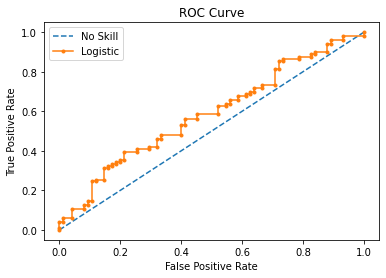

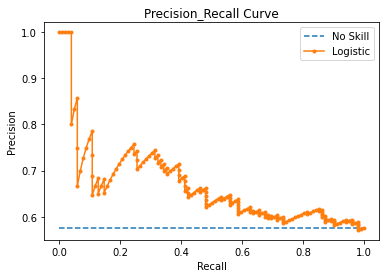

Logistics: AUC=0.666


In [57]:
#comparing with the predictions from a logistic model
Curve_plot(y_test, extreme1_pred, data_df)

Logistics: auc=0.729


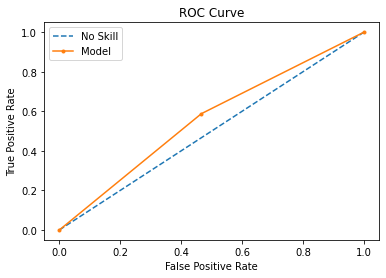

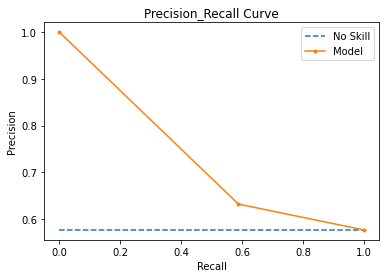

In [58]:
#plotting the ROC curve for random forest tree classifier
Curve_plot(y_test, extreme_pred)

Logistics: auc=0.729


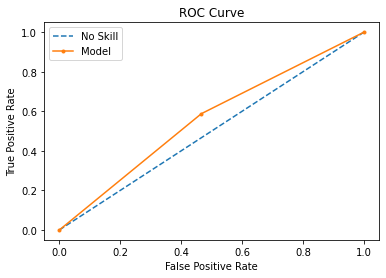

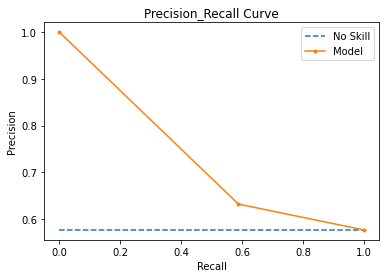

In [59]:
#plotting the ROC curve for xgboost
Curve_plot(y_test, extreme_pred)

Logistics: auc=0.737


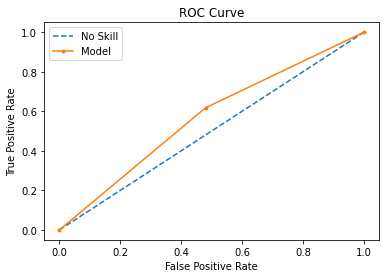

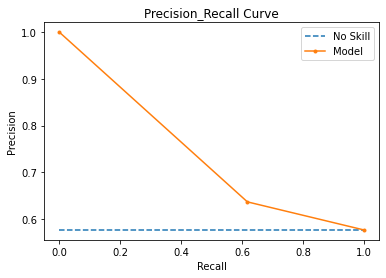

In [60]:
#plotting the ROC curve for decision tree
Curve_plot(y_test, dec_pred)

Logistics: auc=0.706


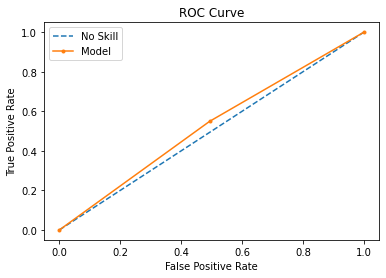

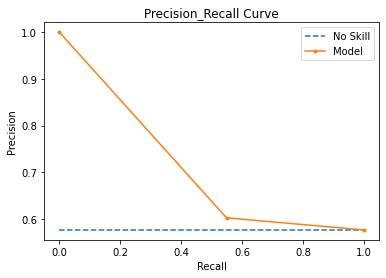

In [61]:
#plotting the roc for extra tree
Curve_plot(y_test, tree_param_pred)

<h2>PRECISION-RECALL CURVE</h2>
This measure is also useful in applied machine learning for evaluating binary classification models.

Precision is a ratio of the number of true positives divided by the sum of the true positives and false positives. It describes how good a model is at predicting the positive class. Precision is referred to as the positive predictive value.

Positive Predictive Power = True Positives / (True Positives + False Positives)
**or**
Precision = True Positives / (True Positives + False Positives)

Recall is calculated as the ratio of the number of true positives divided by the sum of the true positives and the false negatives. Recall is the same as sensitivity.

Recall = True Positives / (True Positives + False Negatives)
**or**
Sensitivity = True Positives / (True Positives + False Negatives)


Reviewing both precision and recall is useful in cases where there is an imbalance in the observations between the two classes. Specifically, there are many examples of no event (class 0) and only a few examples of an event (class 1).
The reason for this is that typically the large number of class 0 examples means we are less interested in the skill of the model at predicting class 0 correctly, e.g. high true negatives.
Key to the calculation of precision and recall is that the calculations do not make use of the true negatives. It is only concerned with the correct prediction of the minority class, class 1.
A precision-recall curve is a plot of the precision (y-axis) and the recall (x-axis) for different thresholds, much like the ROC curve.
A no-skill classifier is one that cannot discriminate between the classes and would predict a random class or a constant class in all cases. The no-skill line changes based on the distribution of the positive to negative classes. It is a horizontal line with the value of the ratio of positive cases in the dataset. For a balanced dataset, this is 0.5.
While the baseline is fixed with ROC, the baseline of precision-recall curve is determined by the ratio of positives (P) and negatives (N) as y = P / (P + N). For instance, we have y = 0.5 for a balanced class distribution …


<h1>NOTE</h1>
<h3>IF THIS NOTEBOOK WAS HELPFUL, KINDLY VOTE FOR ME USING THESE DETAILS</h3>
<h2> Name: OSIGWE MIRACLE</h2>
<h3>ID: c9013e</h3>